# Machine Learning Notes 

Stanford machine learning course https://www.coursera.org/learn/machine-learning/home/welcome 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

### Univariate Regression

Linear regression on one variable, example predict hoiuse price based on area:

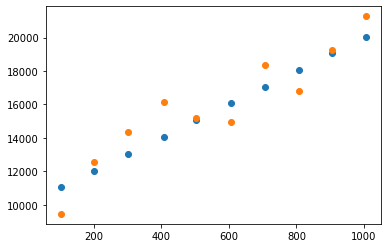

In [20]:
area = np.linspace(100,1000,10)+np.random.random(10)*10
gamma0=10000
gamma1=10
price = gamma0+area*gamma1
pricenoise = gamma0+area*gamma1+(np.random.random(10)-0.5)*5000
plt.scatter(area,price)
plt.scatter(area,pricenoise)
plt.show()

In [62]:
X=area
Y=price
Ynoise=pricenoise

### Cost Function

e.g. Squared error

In [57]:
def costfunctionSE(Y,YHat):
    return np.sum((YHat-Y)**2)/(2*len(Y))

def yHAT(X,th0,th1):
    return X*th1+th0

costfunctionSE(Y,yHAT(X,10000,10))


0.0

#### Cost Landscape

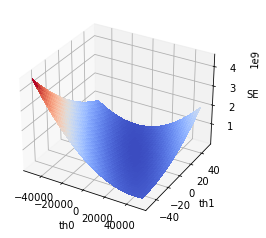

In [79]:

TH0=np.linspace(-50000,50000,101)
TH1=np.linspace(-50,50,101)

costfunctionSE(Y,yHAT(X,TH0[0],TH1[0]))


costsurface=np.zeros((len(TH0),len(TH1),3))
for i in range(0,len(TH0)):
    for j in range(0,len(TH1)):
        th0=TH0[i]
        th1=TH1[j]
        costsurface[i,j]=[th0,th1,costfunctionSE(Ynoise,yHAT(X,th0,th1))]
        
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(costsurface[:,:,0], costsurface[:,:,1], costsurface[:,:,2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('th0')
ax.set_ylabel('th1')
ax.set_zlabel('SE')

plt.show()

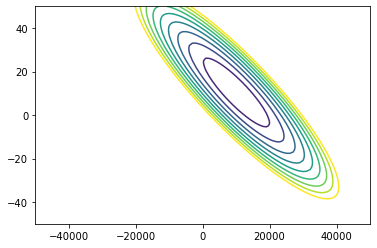

In [86]:
fig, ax = plt.subplots()
CS = ax.contour(costsurface[:,:,0], costsurface[:,:,1], costsurface[:,:,2],np.linspace(0,1*10**8,10))
plt.show()

In [64]:
np.argmin(costsurface[:,:,2])
ind = np.unravel_index(np.argmin(costsurface[:,:,2], axis=None), costsurface[:,:,2].shape)
costsurface[ind[0],ind[1]]

array([1.00000000e+04, 1.00000000e+01, 7.50829202e+05])

### Use optimize to find minimum

In [101]:
from scipy.optimize import minimize

def obj(args):
    th0=args[0]
    th1=args[1]
    return costfunctionSE(Ynoise,yHAT(X,th0,th1))

res = minimize(obj,x0=[0.0,0.0])

print(res['x'])

[10071.06540106    10.3877311 ]


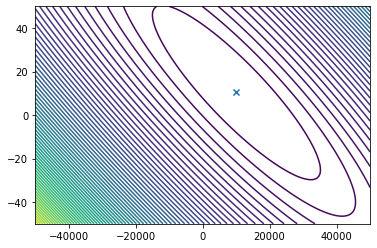

In [102]:
fig, ax = plt.subplots()
CS = ax.contour(costsurface[:,:,0], costsurface[:,:,1], costsurface[:,:,2],np.linspace(0,5*10**9,75))
ax.scatter(res['x'][0],res['x'][1],marker = 'x')
plt.show()

## Use built in linear regression library

In [129]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
LR = LinearRegression().fit(np.reshape(X,(len(X),1)),Ynoise)
Yhat=LR.predict(np.reshape(X,(len(X),1)))

In [133]:
print("Coefficients: {}\nIntercetp: {}".format(LR.coef_,LR.intercept_))
print("Mean Squared Error: {}\n R^2 score: {}".format(mean_squared_error(Ynoise,Yhat),r2_score(Ynoise,Yhat)))

Coefficients: [10.38773529]
Intercetp: 10071.062044776514
Mean Squared Error: 1407237.4768361864
 R^2 score: 0.8642253956801916


## Polynomial Regeression

In [19]:
times = np.linspace(0.0,100.0,1000)

In [20]:
v0 = 100
h0 = 1
height = h0 + times * v0 - 0.5 * 9.81*times**2

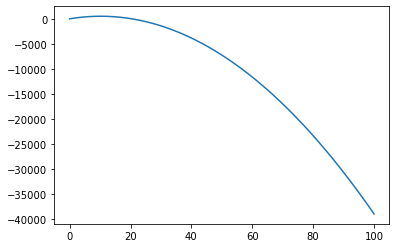

In [21]:
plt.plot(times, height)
plt.show()